# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q='
cities_test = cities[:20]
weather_list = []
for i in cities:
    response = requests.get(base_url + i).json()
    try:
        weather_list.append([response['name'], response['sys']['country'], response['coord']['lat'], response['coord']['lon'],
                           response['main']['temp_max'], response['main']['humidity'], response['wind']['speed'],
                           response['clouds']['all']])
        print(f"Checking city #{cities.index(i)}: {i.title()}")
    except:
        print("City not found. Next city...")

Checking city #0: Punta Arenas
Checking city #1: Hobart
Checking city #2: Torbay
City not found. Next city...
Checking city #4: Mahebourg
Checking city #5: Severo-Kurilsk
Checking city #6: Usinsk
Checking city #7: Beitbridge
Checking city #8: Suntar
Checking city #9: Mar Del Plata
Checking city #10: Barrow
Checking city #11: Provideniya
Checking city #12: Tiksi
Checking city #13: East London
Checking city #14: Hermanus
Checking city #15: Lensk
Checking city #16: Kapaa
Checking city #17: Dikson
Checking city #18: Butaritari
Checking city #19: Lebu
Checking city #20: Jackson
Checking city #21: Flinders
Checking city #22: Baykit
Checking city #23: Rikitea
Checking city #24: Sao Filipe
Checking city #25: Albany
Checking city #26: Broome
Checking city #27: Carnarvon
Checking city #28: Hilo
Checking city #29: San Cristobal
City not found. Next city...
Checking city #31: Ixtapa
Checking city #32: Arcachon
Checking city #33: Suileng
Checking city #34: Mataura
Checking city #35: Bluff
Checking 

Checking city #284: Okhotsk
Checking city #285: Bibiani
Checking city #286: Mercedes
Checking city #287: Podgorodnyaya Pokrovka
Checking city #288: Abnub
Checking city #289: Cayenne
Checking city #290: Guilin
Checking city #291: Poum
Checking city #292: Mugur-Aksy
Checking city #293: Galle
Checking city #294: Yatou
Checking city #295: Belyy Yar
Checking city #296: Ilheus
Checking city #297: La Romana
Checking city #298: Kieta
City not found. Next city...
Checking city #300: Xining
Checking city #301: Karwar
Checking city #302: Saint-Joseph
Checking city #303: Nalut
Checking city #304: Tucumcari
Checking city #305: Kinsale
Checking city #306: Angra Dos Reis
Checking city #307: Tezu
Checking city #308: Vestmannaeyjar
Checking city #309: Cherskiy
Checking city #310: Rio Grande
Checking city #311: Kota Kinabalu
City not found. Next city...
Checking city #313: Vila Franca Do Campo
Checking city #314: San Javier
Checking city #315: Visby
City not found. Next city...
Checking city #317: Yarin

City not found. Next city...
Checking city #566: Pontes E Lacerda
Checking city #567: Roald
Checking city #568: Uruzgan
Checking city #569: Andenes
Checking city #570: Sanchursk
Checking city #571: Curanilahue
Checking city #572: Tabas
Checking city #573: Blagoyevo
Checking city #574: Machaneng
Checking city #575: Palmer
Checking city #576: Arkhangelskaya
Checking city #577: Sao Joao Da Barra
Checking city #578: Macau
City not found. Next city...
Checking city #580: Acari
Checking city #581: Jinxiang
Checking city #582: Celestun
Checking city #583: Rawson
Checking city #584: Jawhar
Checking city #585: Burnie
Checking city #586: Maningrida
Checking city #587: Skibbereen
City not found. Next city...
Checking city #589: Eseka
Checking city #590: Cabiraoan
Checking city #591: Pacific Grove
Checking city #592: Wyndham
Checking city #593: Muzhi
Checking city #594: Bongandanga
Checking city #595: Jaisalmer
Checking city #596: Kurchum
Checking city #597: Pecos
City not found. Next city...
Chec

In [31]:
weather_df = pd.DataFrame(weather_list, columns=['City', 'Country', 'Latitude', 'Longitude', 'Max Temp (F)', 
                                                 'Humidity %', 'Wind (mph)', 'Cloudiness %'])

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
weather_df.to_csv(output_data_file)

In [33]:
weather_df.head(10)

,City,Country,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %
0,Punta Arenas,CL,-53.15,-70.92,37.40,86,12.75,20
1,Hobart,AU,-42.88,147.33,51.01,66,6.93,75
2,Torbay,CA,47.67,-52.73,61.00,100,5.82,90
3,Mahébourg,MU,-20.41,57.70,71.60,83,4.70,75
4,Severo-Kuril'sk,RU,50.68,156.12,54.88,92,9.48,99
5,Usinsk,RU,65.99,57.53,48.43,82,6.42,0
6,Beitbridge,ZW,-22.22,30.00,61.56,34,7.54,0
7,Suntar,RU,62.14,117.63,55.58,73,4.18,31
8,Mar del Plata,AR,-38.00,-57.56,50.00,70,8.05,100
9,Barrow,US,71.29,-156.79,37.40,93,8.05,90


In [34]:
weather_df.describe()

,Latitude,Longitude,Max Temp (F),Humidity %,Wind (mph),Cloudiness %
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,21.286132,22.844390,68.983850,71.264808,7.642369,49.637631
std,33.670718,90.400974,14.204872,20.724055,5.199484,38.991533
min,-54.800000,-175.200000,30.990000,3.000000,0.400000,0.000000
25%,-7.957500,-57.207500,57.200000,59.250000,3.670000,6.000000
50%,26.340000,30.395000,71.600000,77.000000,6.880000,44.000000
75%,50.197500,102.442500,80.010000,87.000000,10.585000,90.000000
max,78.220000,179.320000,109.000000,100.000000,50.600000,100.000000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [35]:
def scatter_builder(x_axis, y_axis):
    plt.figure(figsize=(12,8))
    weather_scatter = plt.scatter(weather_df[x_axis], weather_df[y_axis], edgecolors='black')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(f'{x_axis} to {y_axis} on (7/30/2020)')
    plt.show()

## Latitude vs. Temperature Plot

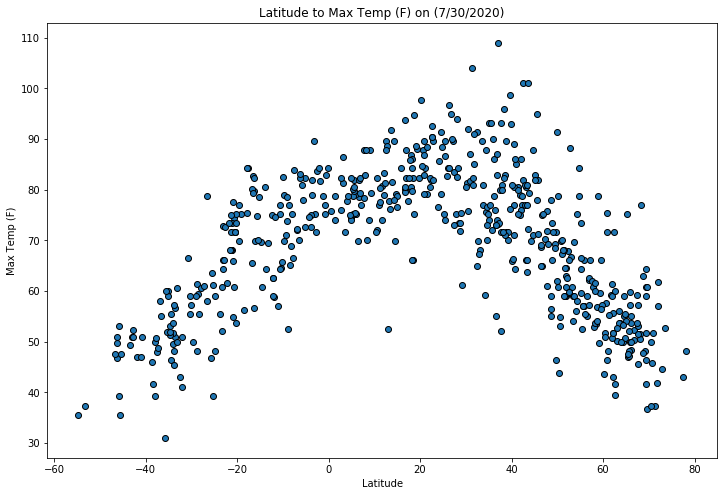

In [36]:
scatter_builder('Latitude', 'Max Temp (F)')

## Latitude vs. Humidity Plot

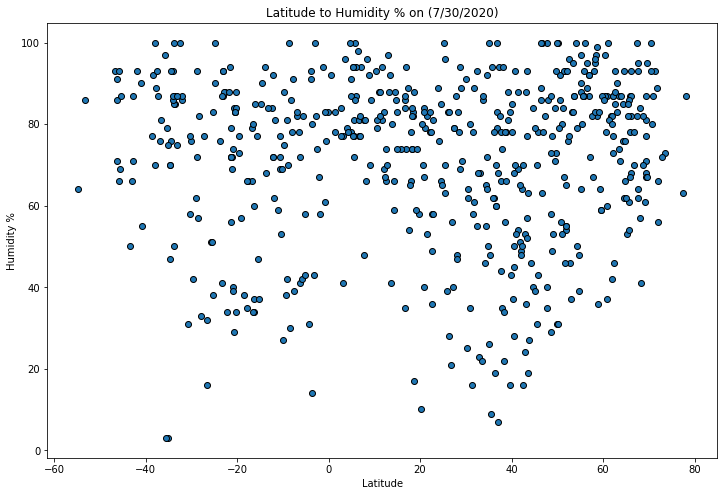

In [38]:
scatter_builder('Latitude', 'Humidity %')

## Latitude vs. Cloudiness Plot

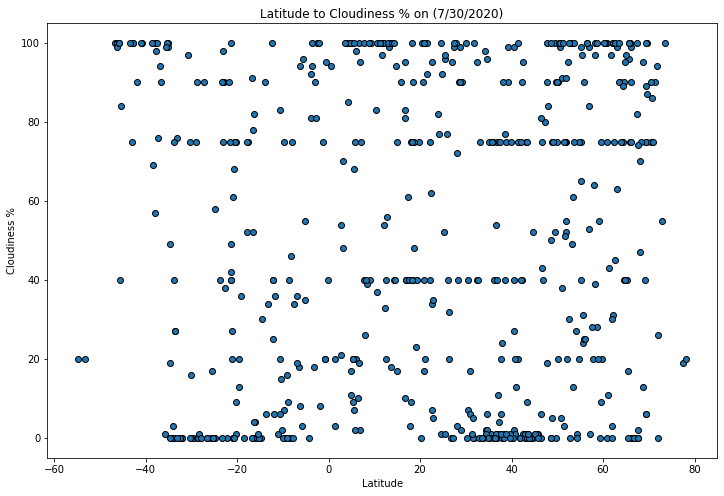

In [39]:
scatter_builder('Latitude', 'Cloudiness %')

## Latitude vs. Wind Speed Plot

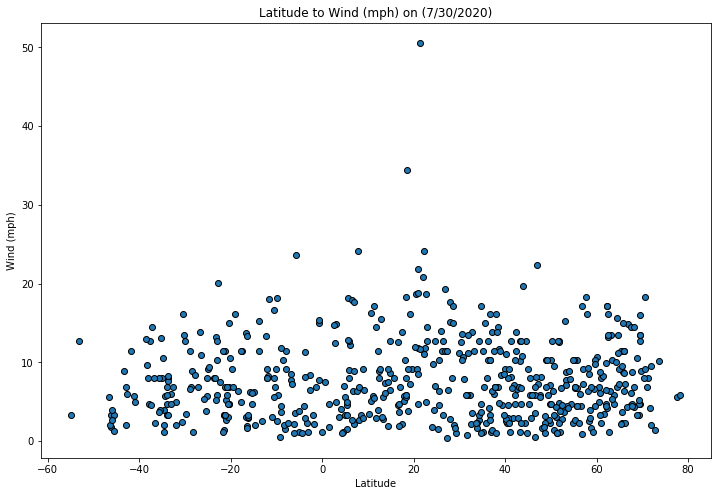

In [40]:
scatter_builder('Latitude', 'Wind (mph)')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression